In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# clean academic style
plt.rcParams["font.family"] = "serif"
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.0


In [27]:
df = pd.read_csv("/content/sample_data/Smart_Home_Fire_Risk_Balanced.csv")
df.head()

,Temperature_C,Humidity_%,CO2_ppm,Smoke_Level,Fire_Sensor,Motion_Detected,Sound_Level_dB,Light_Intensity_lux,Smart_LED_On,Smart_Door_Status,AC_Status,Fan_Status,Window_Status,Sprinkler_Status,Power_Consumption_W,Room_Type,Day_Night,Occupancy,Alert_Triggered,Fire_Risk
0,27.922065,40.607585,503.063651,0.181935,0,1,36.664384,308.783013,0,Open,1,0,Closed,1,295.248463,Study,Day,1,0,1
1,30.243536,41.595070,763.943867,0.134182,0,0,27.506587,345.170395,0,Closed,1,1,Open,0,543.465613,Store,Night,1,0,0
2,24.901811,60.294406,830.609510,0.334588,0,0,38.801774,84.561629,1,Open,0,1,Closed,0,316.187373,Bedroom,Night,1,0,1
3,21.239218,69.422456,851.468244,0.146894,0,1,51.781854,299.832268,0,Closed,1,0,Open,0,465.980238,Bedroom,Day,1,0,0
4,27.197506,62.334061,637.800564,0.088061,0,0,46.940470,409.113863,1,Open,0,0,Closed,0,444.077826,Bedroom,Day,1,0,0


In [28]:
df

,Temperature_C,Humidity_%,CO2_ppm,Smoke_Level,Fire_Sensor,Motion_Detected,Sound_Level_dB,Light_Intensity_lux,Smart_LED_On,Smart_Door_Status,AC_Status,Fan_Status,Window_Status,Sprinkler_Status,Power_Consumption_W,Room_Type,Day_Night,Occupancy,Alert_Triggered,Fire_Risk
0,27.922065,40.607585,503.063651,0.181935,0,1,36.664384,308.783013,0,Open,1,0,Closed,1,295.248463,Study,Day,1,0,1
1,30.243536,41.595070,763.943867,0.134182,0,0,27.506587,345.170395,0,Closed,1,1,Open,0,543.465613,Store,Night,1,0,0
2,24.901811,60.294406,830.609510,0.334588,0,0,38.801774,84.561629,1,Open,0,1,Closed,0,316.187373,Bedroom,Night,1,0,1
3,21.239218,69.422456,851.468244,0.146894,0,1,51.781854,299.832268,0,Closed,1,0,Open,0,465.980238,Bedroom,Day,1,0,0
4,27.197506,62.334061,637.800564,0.088061,0,0,46.940470,409.113863,1,Open,0,0,Closed,0,444.077826,Bedroom,Day,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,28.554800,35.563957,905.581596,0.317227,0,0,39.360511,349.668562,0,Open,0,1,Open,0,594.116632,Store,Day,1,0,1
3996,29.665640,54.448959,664.321677,0.317390,0,0,33.586568,101.942803,0,Open,1,1,Open,0,484.718904,Kitchen,Day,1,0,1
3997,19.592260,44.220792,452.304947,0.335345,0,0,36.964534,397.549956,0,Open,1,0,Open,0,402.813585,Study,Night,0,0,1
3998,23.977644,48.204854,575.994199,0.095507,0,0,38.168523,248.822581,0,Closed,1,1,Open,0,562.309207,Study,Day,0,0,0


# **Missing Value Analysis**

In [29]:
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature_C        4000 non-null   float64
 1   Humidity_%           4000 non-null   float64
 2   CO2_ppm              4000 non-null   float64
 3   Smoke_Level          4000 non-null   float64
 4   Fire_Sensor          4000 non-null   int64  
 5   Motion_Detected      4000 non-null   int64  
 6   Sound_Level_dB       4000 non-null   float64
 7   Light_Intensity_lux  4000 non-null   float64
 8   Smart_LED_On         4000 non-null   int64  
 9   Smart_Door_Status    4000 non-null   object 
 10  AC_Status            4000 non-null   int64  
 11  Fan_Status           4000 non-null   int64  
 12  Window_Status        4000 non-null   object 
 13  Sprinkler_Status     4000 non-null   int64  
 14  Power_Consumption_W  4000 non-null   float64
 15  Room_Type            4000 non-null   o

In [30]:
print("Shape:", df.shape)
display(df.head())

print("\nInfo:")
df.info()

missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("\nMissing values:")
display(missing)

# Optional: Missing bar plot (if any)
if len(missing) > 0:
    plt.figure(figsize=(10,4))
    plt.bar(missing.index, missing.values)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Missing Count")
    plt.title("Missing Values per Column")
    plt.tight_layout()
    plt.show()


Shape: (4000, 20)


,Temperature_C,Humidity_%,CO2_ppm,Smoke_Level,Fire_Sensor,Motion_Detected,Sound_Level_dB,Light_Intensity_lux,Smart_LED_On,Smart_Door_Status,AC_Status,Fan_Status,Window_Status,Sprinkler_Status,Power_Consumption_W,Room_Type,Day_Night,Occupancy,Alert_Triggered,Fire_Risk
0,27.922065,40.607585,503.063651,0.181935,0,1,36.664384,308.783013,0,Open,1,0,Closed,1,295.248463,Study,Day,1,0,1
1,30.243536,41.595070,763.943867,0.134182,0,0,27.506587,345.170395,0,Closed,1,1,Open,0,543.465613,Store,Night,1,0,0
2,24.901811,60.294406,830.609510,0.334588,0,0,38.801774,84.561629,1,Open,0,1,Closed,0,316.187373,Bedroom,Night,1,0,1
3,21.239218,69.422456,851.468244,0.146894,0,1,51.781854,299.832268,0,Closed,1,0,Open,0,465.980238,Bedroom,Day,1,0,0
4,27.197506,62.334061,637.800564,0.088061,0,0,46.940470,409.113863,1,Open,0,0,Closed,0,444.077826,Bedroom,Day,1,0,0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature_C        4000 non-null   float64
 1   Humidity_%           4000 non-null   float64
 2   CO2_ppm              4000 non-null   float64
 3   Smoke_Level          4000 non-null   float64
 4   Fire_Sensor          4000 non-null   int64  
 5   Motion_Detected      4000 non-null   int64  
 6   Sound_Level_dB       4000 non-null   float64
 7   Light_Intensity_lux  4000 non-null   float64
 8   Smart_LED_On         4000 non-null   int64  
 9   Smart_Door_Status    4000 non-null   object 
 10  AC_Status            4000 non-null   int64  
 11  Fan_Status           4000 non-null   int64  
 12  Window_Status        4000 non-null   object 
 13  Sprinkler_Status     4000 non-null   int64  
 14  Power_Consumption_W  4000 non-null   float64
 15  Room_Type            4000 non-n

,0


# **Target Class Distribution**

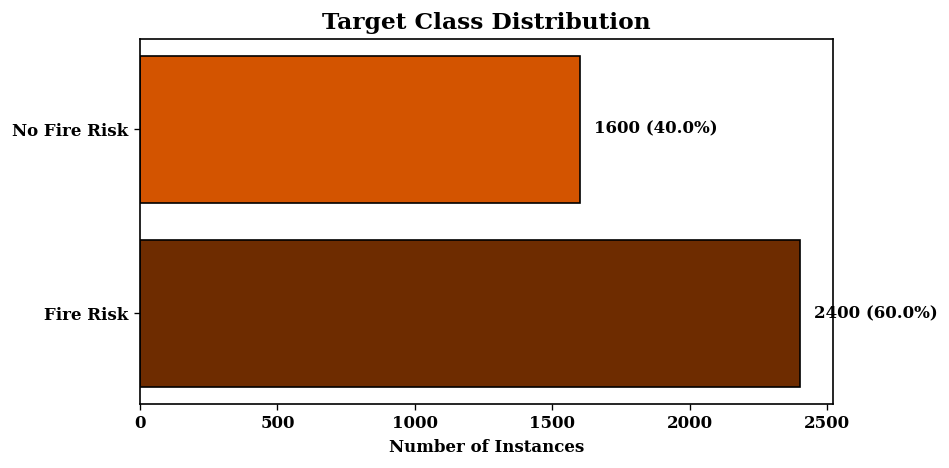

In [31]:
label_map = {0: "No Fire Risk", 1: "Fire Risk"}
df["Fire_Risk_Label"] = df["Fire_Risk"].map(label_map)

counts = df["Fire_Risk_Label"].value_counts()

plt.figure(figsize=(8,4))
bars = plt.barh(counts.index, counts.values,
                color=["#6e2c00", "#d35400"],
                edgecolor="black")

plt.title("Target Class Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Number of Instances")

for bar in bars:
    plt.text(bar.get_width()+50,
             bar.get_y()+bar.get_height()/2,
             f"{bar.get_width()} ({bar.get_width()/sum(counts)*100:.1f}%)",
             va="center", fontweight="bold")

plt.tight_layout()
plt.show()


# **Numerical Feature Distribution**

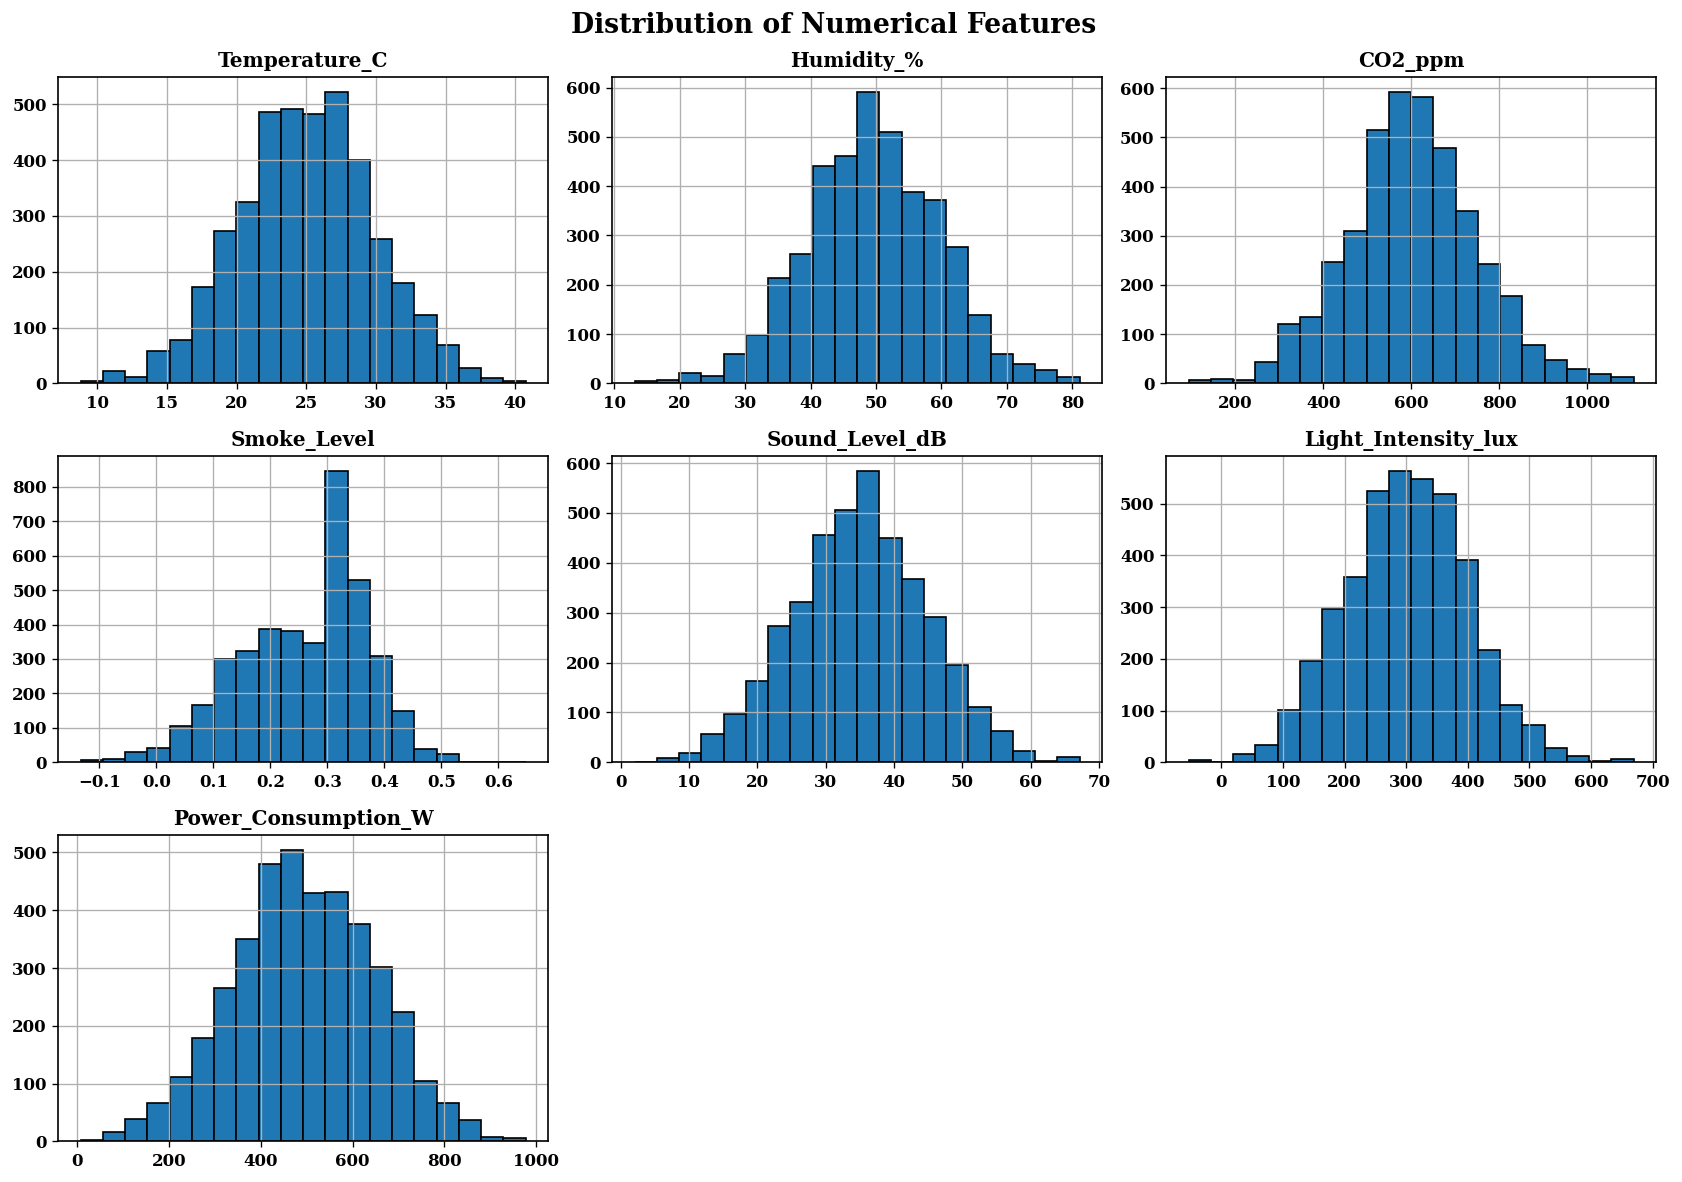

In [32]:
num_cols = [
    "Temperature_C", "Humidity_%", "CO2_ppm", "Smoke_Level",
    "Sound_Level_dB", "Light_Intensity_lux", "Power_Consumption_W"
]

df[num_cols].hist(
    bins=20,
    figsize=(14,10),
    edgecolor="black"
)
plt.suptitle("Distribution of Numerical Features",
             fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


# **Correlation Heatmap**

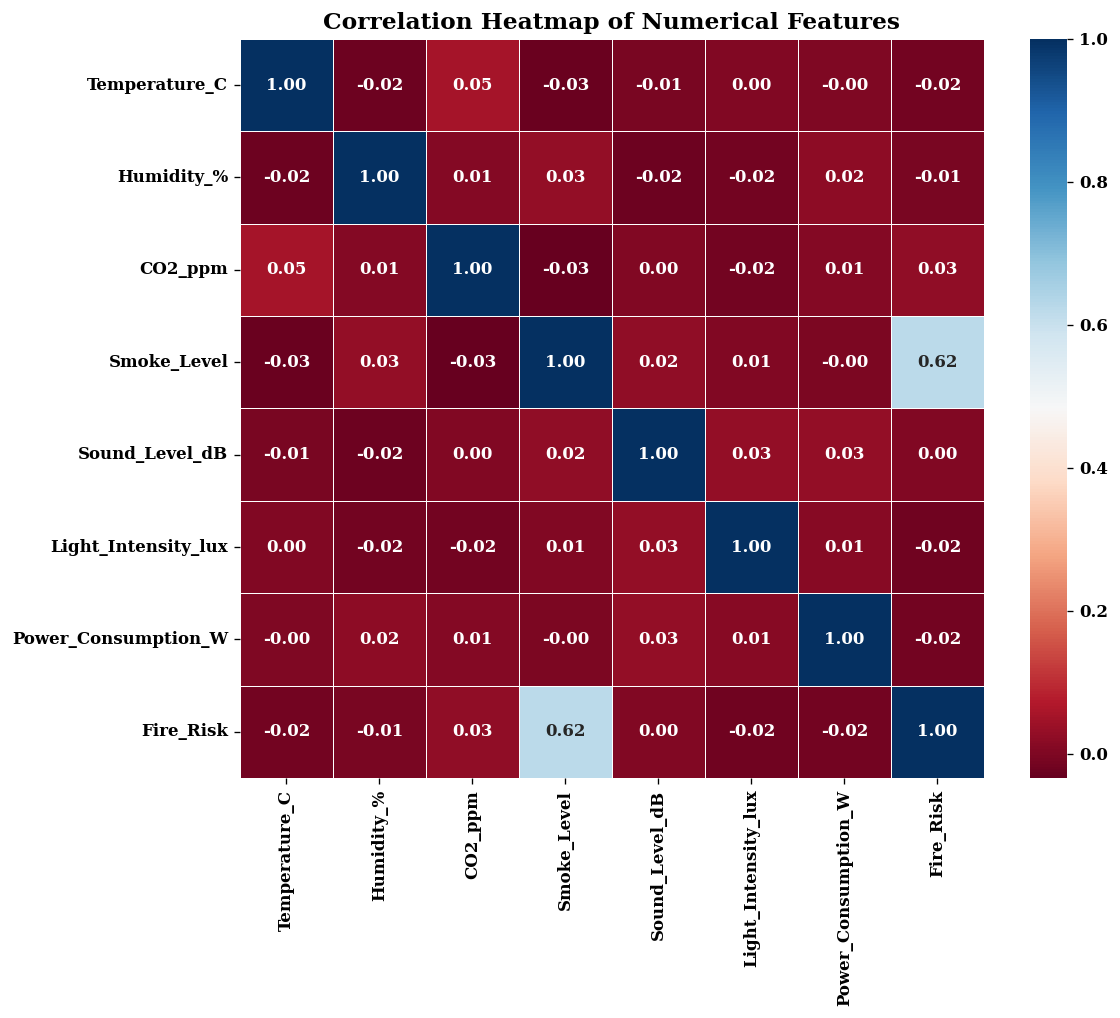

In [33]:
plt.figure(figsize=(10,8))
corr = df[num_cols + ["Fire_Risk"]].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="RdBu",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features",
          fontsize=14, fontweight="bold")
plt.show()


# **Feature vs Target Relationship**

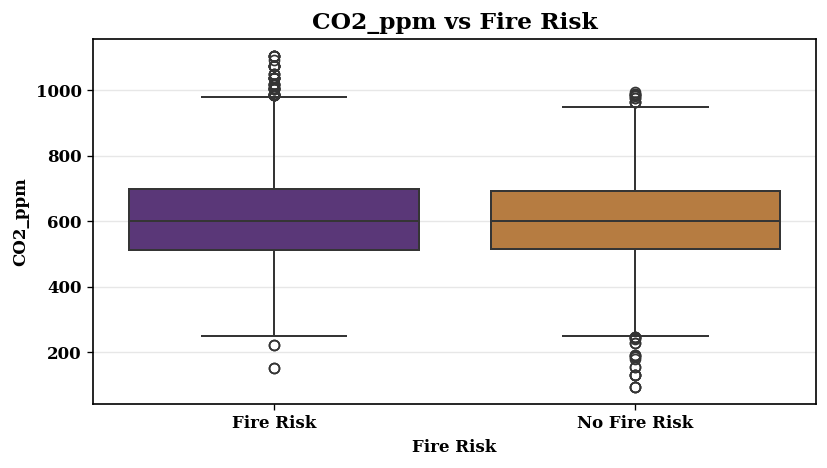

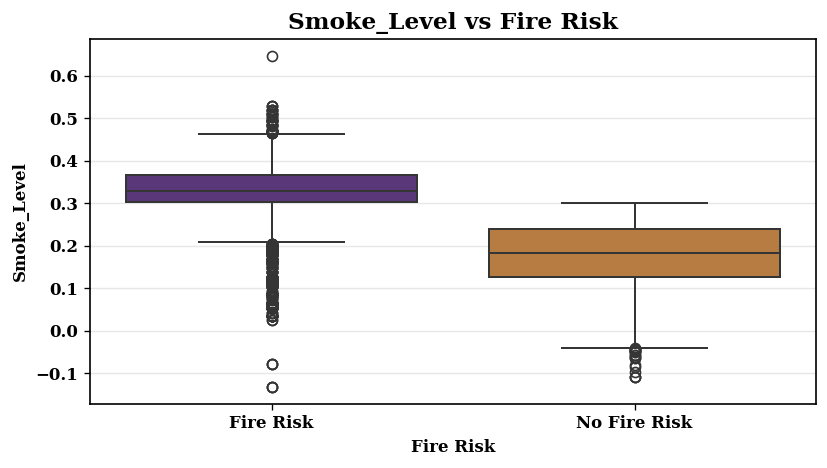

In [37]:
num_features = ["CO2_ppm", "Smoke_Level"]

for col in num_features:
    plt.figure(figsize=(7, 4))
    ax = sns.boxplot(
        x="Fire_Risk_Label", y=col, data=df,
        hue="Fire_Risk_Label",  # seaborn warning avoid
        palette=palette_binary,
        showfliers=True,
        linewidth=1.2
    )
    if ax.legend_ is not None:  # Check if legend exists
        ax.legend_.remove()  # single label enough
    plt.title(f"{col} vs Fire Risk", fontsize=14, fontweight="bold")
    plt.xlabel("Fire Risk", fontweight="bold")
    plt.ylabel(col, fontweight="bold")
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")
    plt.grid(axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

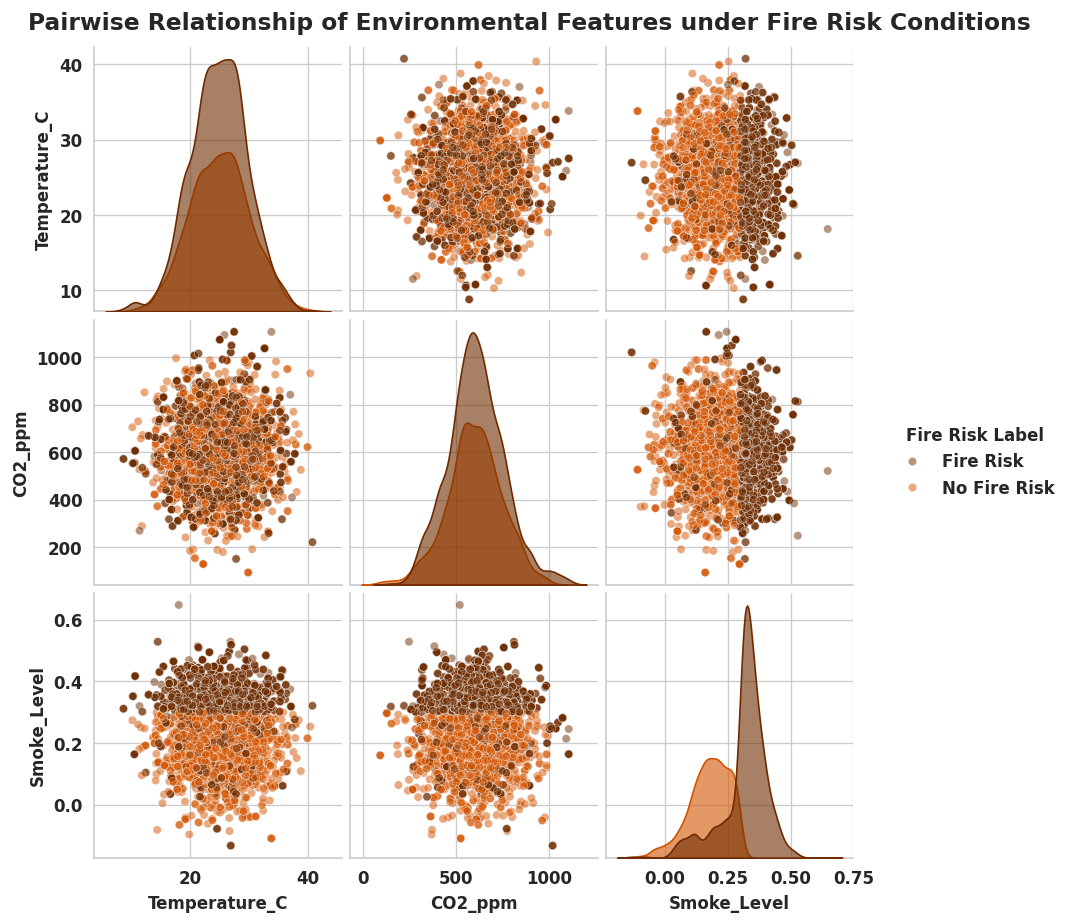

In [152]:
g = sns.pairplot(
    df,
    vars=["Temperature_C", "CO2_ppm", "Smoke_Level"],
    hue="Fire_Risk_Label",
    palette=["#6e2c00", "#d35400"],
    plot_kws={"alpha": 0.5, "s": 25},
    diag_kws={"alpha": 0.6}
)

# 🔹 Figure-level title
g.fig.suptitle(
    "Pairwise Relationship of Environmental Features under Fire Risk Conditions",
    fontsize=14,
    fontweight="bold",
    y=1.02
)
g._legend.set_title("Fire Risk Label")
g._legend.get_title().set_fontweight("bold")
for text in g._legend.texts:
    text.set_fontweight("bold")


plt.show()


# **Categorical Feature Distribution**

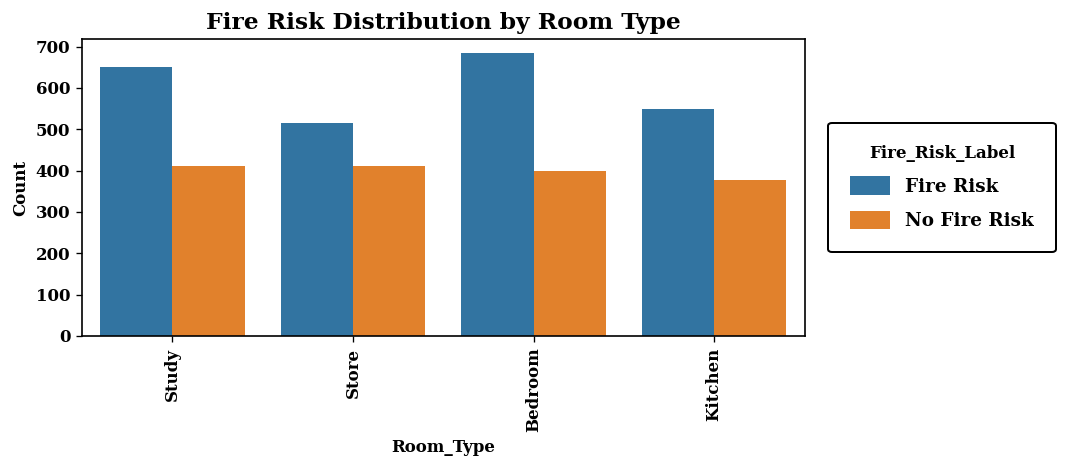

In [64]:
plt.figure(figsize=(9, 4))

ax = sns.countplot(
    x="Room_Type",
    hue="Fire_Risk_Label",
    data=df
)

# Titles & labels
plt.title("Fire Risk Distribution by Room Type", fontweight="bold", fontsize=14)
plt.xlabel("Room_Type", fontweight="bold")
plt.ylabel("Count", fontweight="bold")
plt.xticks(rotation=90, fontweight="bold")
plt.yticks(fontweight="bold")

# ✅ Create space for legend on the right
plt.subplots_adjust(right=0.80)

# ✅ Bigger legend, boxed, rounded, no overlap
leg = ax.legend(
    title="Fire_Risk_Label",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),   # right-center
    frameon=True,
    fancybox=True,               # rounded corners
    framealpha=1.0,
    borderpad=1.2,               # box padding (bigger box)
    labelspacing=0.8,            # space between labels
    handlelength=2.2,
    handleheight=1.2,
    fontsize=11
)

# Legend title bold
leg.get_title().set_fontweight("bold")

# Black border
leg.get_frame().set_edgecolor("black")
leg.get_frame().set_linewidth(1.2)

plt.tight_layout()
plt.show()


In [67]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# leakage drop (
leakage_cols = ["Fire_Risk","Fire_Risk_Label","Alert_Triggered","Fire_Sensor","Sprinkler_Status"]
X = df.drop(columns=[c for c in leakage_cols if c in df.columns])
y = df["Fire_Risk"]




In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

In [69]:
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dt_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", DecisionTreeClassifier(
        max_depth=5,
        min_samples_split=30,
        min_samples_leaf=15,
        random_state=42
    ))
])

dt_pipe.fit(X_train, y_train)

y_pred = dt_pipe.predict(X_test)

print("Decision Tree Train Acc:", dt_pipe.score(X_train, y_train))
print("Decision Tree Test  Acc:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Decision Tree Train Acc: 0.8885714285714286
Decision Tree Test  Acc: 0.88
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       480
           1       0.95      0.84      0.89       720

    accuracy                           0.88      1200
   macro avg       0.88      0.89      0.88      1200
weighted avg       0.89      0.88      0.88      1200

[[449  31]
 [113 607]]


In [71]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=400,
        max_depth=12,
        min_samples_split=25,
        min_samples_leaf=10,
        max_features="sqrt",
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_test)

print("Random Forest Train Acc:", rf_pipe.score(X_train, y_train))
print("Random Forest Test  Acc:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Random Forest Train Acc: 0.8982142857142857
Random Forest Test  Acc: 0.8925
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       480
           1       1.00      0.82      0.90       720

    accuracy                           0.89      1200
   macro avg       0.89      0.91      0.89      1200
weighted avg       0.91      0.89      0.89      1200

[[479   1]
 [128 592]]


In [72]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", GradientBoostingClassifier(
        n_estimators=250,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.85,
        random_state=42
    ))
])

gb_pipe.fit(X_train, y_train)
y_pred = gb_pipe.predict(X_test)

print("Gradient Boost Train Acc:", gb_pipe.score(X_train, y_train))
print("Gradient Boost Test  Acc:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Gradient Boost Train Acc: 0.95
Gradient Boost Test  Acc: 0.925
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       480
           1       0.99      0.88      0.93       720

    accuracy                           0.93      1200
   macro avg       0.92      0.94      0.92      1200
weighted avg       0.93      0.93      0.93      1200

[[473   7]
 [ 83 637]]


In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

knn_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", KNeighborsClassifier(n_neighbors=25, weights="distance"))
])

knn_pipe.fit(X_train, y_train)

# threshold tuning helper
def best_threshold_for_f1(y_true, probas, t_min=0.2, t_max=0.9, step=0.01):
    best_t, best_f1 = 0.5, -1
    for t in np.arange(t_min, t_max + step, step):
        y_pred = (probas >= t).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1, best_t = f1, t
    return best_t, best_f1

probas = knn_pipe.predict_proba(X_test)[:, 1]
t_best, f1_best = best_threshold_for_f1(y_test.values, probas)

y_pred = (probas >= t_best).astype(int)

print("KNN Threshold:", round(t_best, 2), "| Best F1:", round(f1_best, 4))
print("KNN Test Acc:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


KNN Threshold: 0.73 | Best F1: 0.9542
KNN Test Acc: 0.9458333333333333
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       480
           1       0.97      0.94      0.95       720

    accuracy                           0.95      1200
   macro avg       0.94      0.95      0.94      1200
weighted avg       0.95      0.95      0.95      1200

[[458  22]
 [ 43 677]]


# Models Accuracy Comparison

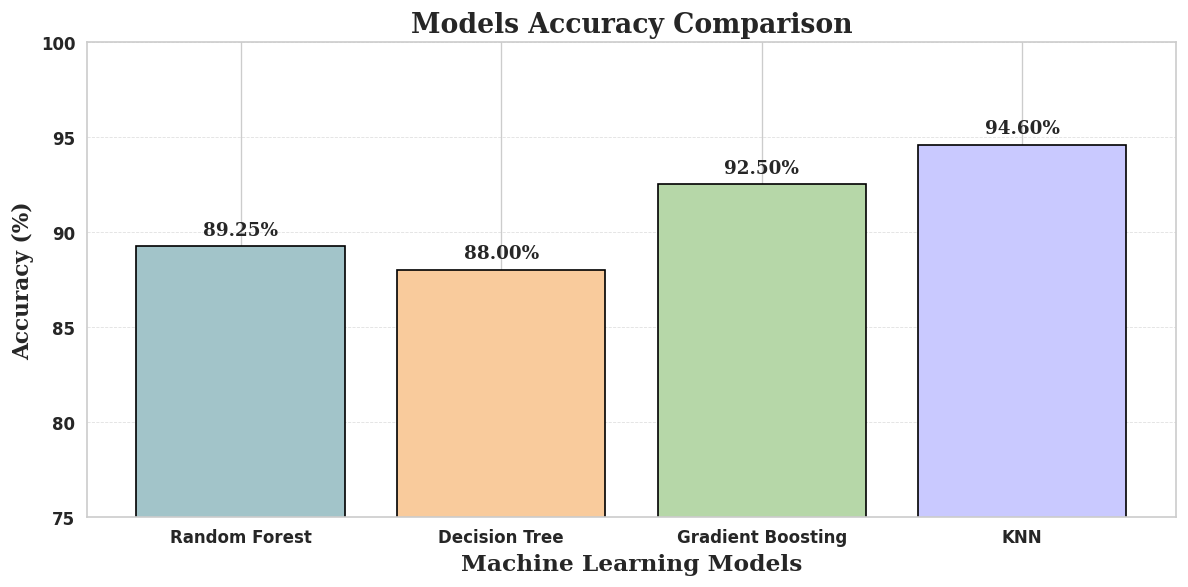

In [153]:
import matplotlib.pyplot as plt

# Model names and accuracies
model_names = ["Random Forest",
    "Decision Tree",
    "Gradient Boosting",
    "KNN"]
accuracies = [ 89.25,   # Random Forest
    88.0,   # Decision Tree
    92.5,   # Gradient Boosting
    94.6]    # KNN

# Unique pastel color palette (IEEE-friendly & clean)
colors = ["#A2C4C9",  # Dusty Teal
          "#F9CB9C",  # Soft Orange
          "#B6D7A8",  # Pale Green
          "#C9C9FF"]  # Soft Lavender

# Plot settings
plt.figure(figsize=(10, 5))
bars = plt.bar(model_names, accuracies, color=colors, edgecolor='black')

# Title and axis labels
plt.title("Models Accuracy Comparison", fontsize=16, fontweight='bold', fontfamily='serif')
plt.ylabel("Accuracy (%)", fontsize=13, fontfamily='serif')
plt.xlabel("Machine Learning Models", fontsize=14, fontfamily='serif')
plt.ylim(75, 100)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)

# Value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.6,
             f"{height:.2f}%", ha='center', fontsize=11, fontweight='bold', fontfamily='serif')

# Tight layout for export
plt.tight_layout()
plt.show()


# Confusion Matrix

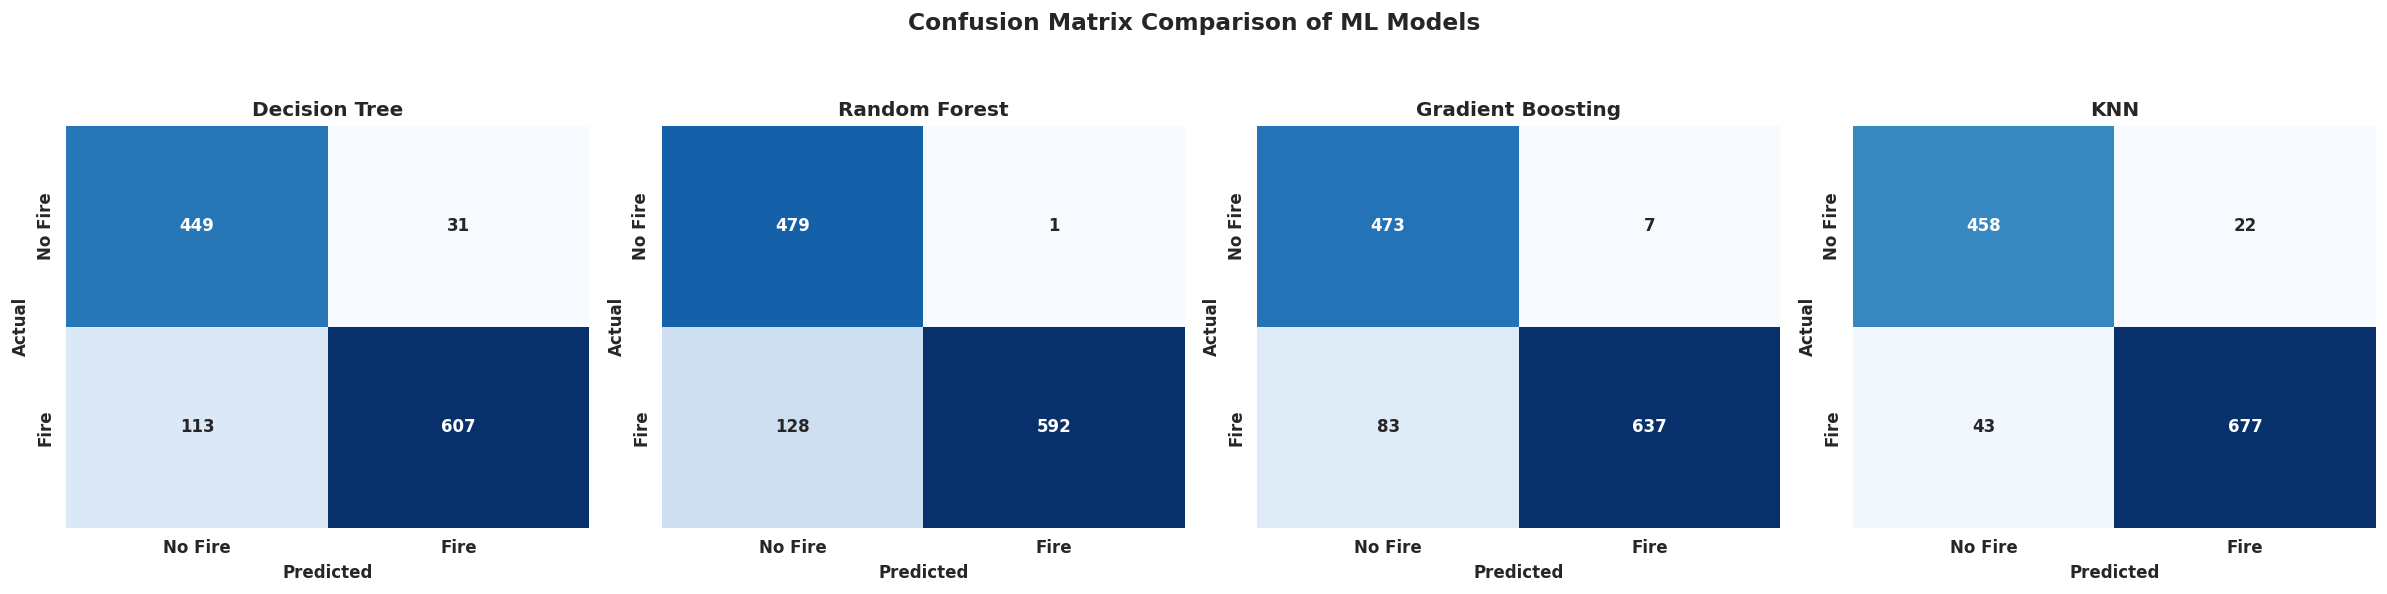

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# ---------------------------
# Models (Only 4)
# ---------------------------
models = {
    "Decision Tree": Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", DecisionTreeClassifier(
            max_depth=5,
            min_samples_split=30,
            min_samples_leaf=15,
            random_state=42
        ))
    ]),

    "Random Forest": Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", RandomForestClassifier(
            n_estimators=400,
            max_depth=12,
            min_samples_split=25,
            min_samples_leaf=10,
            max_features="sqrt",
            class_weight="balanced",
            random_state=42,
            n_jobs=-1
        ))
    ]),

    "Gradient Boosting": Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", GradientBoostingClassifier(
            n_estimators=250,
            learning_rate=0.05,
            max_depth=3,
            subsample=0.85,
            random_state=42
        ))
    ]),

    "KNN": Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", KNeighborsClassifier(
            n_neighbors=25,
            weights="distance"
        ))
    ])
}

# ---------------------------
# Plot
# ---------------------------
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle("Confusion Matrix Comparison of ML Models",
             fontsize=14, fontweight="bold")

for ax, (name, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)

    # KNN threshold handling
    if name == "KNN":
        probas = model.predict_proba(X_test)[:, 1]
        y_pred = (probas >= 0.73).astype(int)
    else:
        y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        xticklabels=["No Fire", "Fire"],
        yticklabels=["No Fire", "Fire"],
        ax=ax
    )

    ax.set_title(name, fontsize=12, fontweight="bold")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


# Spider (Radar) Plot

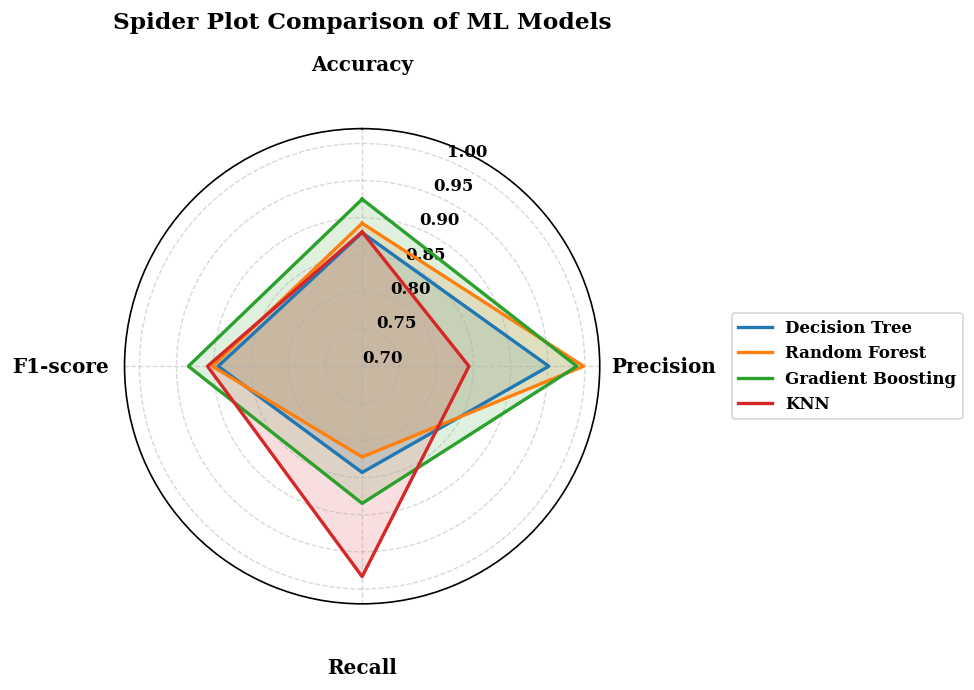

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# -----------------------------
# 1) Store predictions (already trained models)
# -----------------------------
models = {
    "Decision Tree": dt_pipe,
    "Random Forest": rf_pipe,
    "Gradient Boosting": gb_pipe,
    "KNN": knn_pipe
}

metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]

# -----------------------------
# 2) Radar plot setup
# -----------------------------
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# -----------------------------
# 3) Plot each model
# -----------------------------
for model_name, scores in results.items():
    values = scores + scores[:1]
    ax.plot(angles, values, linewidth=2, label=model_name)
    ax.fill(angles, values, alpha=0.15)

# -----------------------------
# 4) Formatting (Professional)
# -----------------------------
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# ✅ Push category labels outward so they don't overlap with the circle
ax.set_thetagrids(np.degrees(angles[:-1]), metrics, fontsize=12, fontweight="bold")
ax.tick_params(axis="x", pad=28)  # <-- increase if you still see overlap (20-24)

# ✅ Add space between title and top label (Accuracy)
ax.set_title(
    "Spider Plot Comparison of ML Models",
    fontsize=14,
    fontweight="bold",
    pad=60 # <-- bigger pad = more gap between title and plot
)

# ✅ Add a little headroom so "Accuracy" doesn't touch the top circle
ax.set_ylim(0.7, 1.02)

ax.grid(True, linestyle="--", alpha=0.5)

# Legend outside (no overlap)
ax.legend(
    loc="center left",
    bbox_to_anchor=(1.26, 0.5),
    frameon=True
)

# ✅ Leave room for outside legend
plt.subplots_adjust(right=0.62, top=0.98)

plt.show()


# Learning Curve of 4 Models

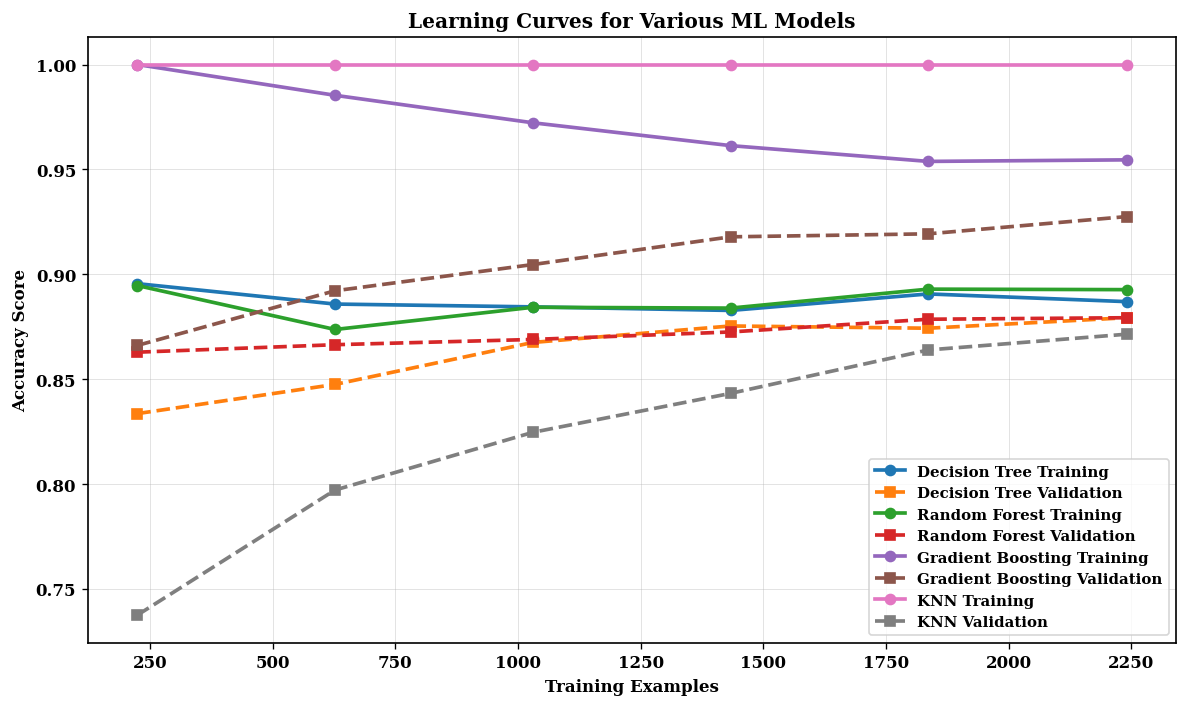

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curves(models, title,
                         train_sizes=np.linspace(0.1, 1.0, 6),
                         cv=5,
                         scoring="accuracy"):

    plt.figure(figsize=(10, 6))

    for model_name, model in models.items():
        sizes, train_scores, val_scores = learning_curve(
            model,
            X_train, y_train,
            train_sizes=train_sizes,
            cv=cv,
            scoring=scoring,
            n_jobs=-1,
            shuffle=True,
            random_state=42
        )

        train_mean = train_scores.mean(axis=1)
        val_mean   = val_scores.mean(axis=1)

        # 🔵 Training curve (solid + marker)
        plt.plot(
            sizes, train_mean,
            linestyle="-",
            marker="o",
            linewidth=2.2,
            markersize=6,
            label=f"{model_name} Training"
        )

        # 🔴 Validation curve (dashed + marker)
        plt.plot(
            sizes, val_mean,
            linestyle="--",
            marker="s",
            linewidth=2.2,
            markersize=6,
            label=f"{model_name} Validation"
        )

    plt.xlabel("Training Examples", fontweight="bold")
    plt.ylabel("Accuracy Score", fontweight="bold")
    plt.title(title, fontweight="bold")

    plt.grid(True, linestyle="-", linewidth=0.6, alpha=0.35)
    plt.legend(loc="lower right", frameon=True, fontsize=9)

    plt.tight_layout()
    plt.show()

# Run
plot_learning_curves(models, "Learning Curves for Various ML Models")


# **Loss Curve**

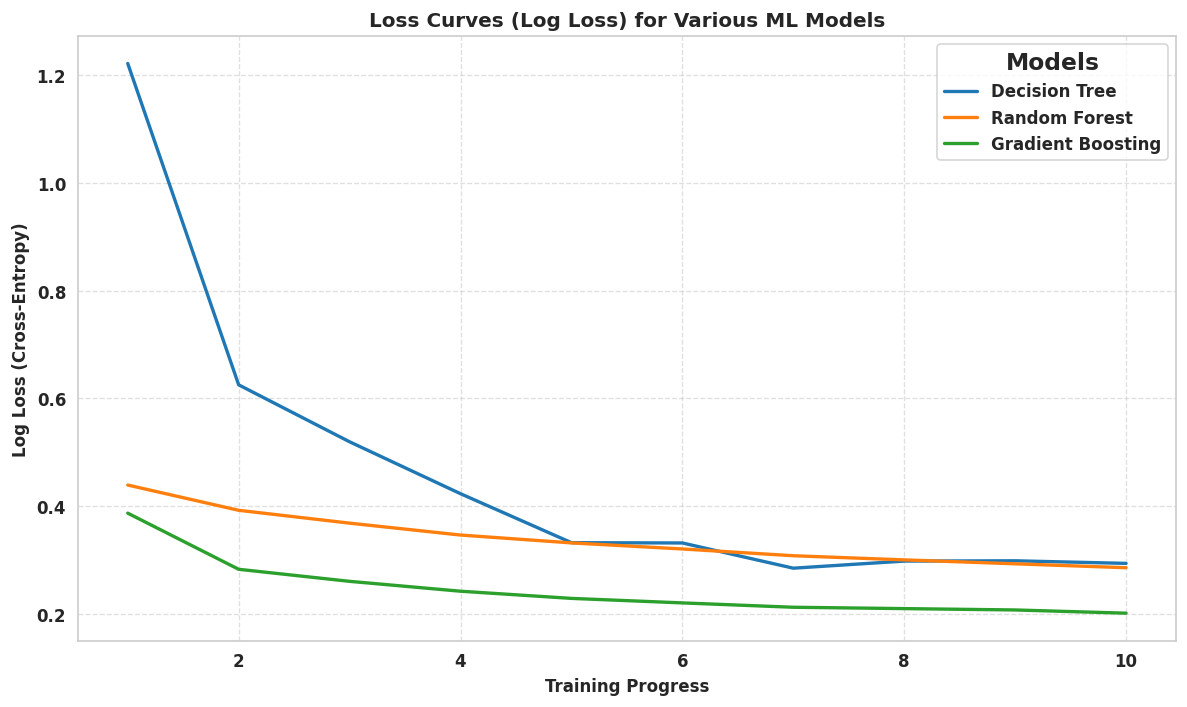

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# -----------------------------
# 1) Base models (pipelines)
# -----------------------------
models = {
    "Decision Tree": dt_pipe,
    "Random Forest": rf_pipe,
    "Gradient Boosting": gb_pipe,
}

# -----------------------------
# 2) Fit models (RF/GB/DT)
# -----------------------------
for name, pipe in models.items():
    pipe.fit(X_train, y_train)

# -----------------------------
# 3) Loss curves dict
# -----------------------------
loss_curves = {}

# --- RF/GB staged log-loss (training progress)
for name, pipe in models.items():
    mdl = pipe.named_steps["model"]

    if hasattr(mdl, "staged_predict_proba"):
        Xtest_tr = pipe.named_steps["preprocess"].transform(X_test)
        losses = []
        for proba in mdl.staged_predict_proba(Xtest_tr):
            losses.append(log_loss(y_test, proba))
        loss_curves[name] = np.array(losses)
    else:
        # DT usually single-step
        proba = pipe.predict_proba(X_test)
        loss_curves[name] = np.array([log_loss(y_test, proba)])

# --- KNN loss curve by sweeping K (THIS is how KNN can have a curve)
K_MAX = 30
knn_losses = []

for k in range(1, K_MAX + 1):
    knn_pipe_k = Pipeline(steps=[
        ("preprocess", knn_pipe.named_steps["preprocess"]),
        ("model", KNeighborsClassifier(n_neighbors=k, weights="distance"))
    ])
    knn_pipe_k.fit(X_train, y_train)
    proba = knn_pipe_k.predict_proba(X_test)
    knn_losses.append(log_loss(y_test, proba))

loss_curves["KNN (K sweep)"] = np.array(knn_losses)

# -----------------------------
# 4) Normalize steps like sir
# -----------------------------
max_steps = max(len(curve) for curve in loss_curves.values())
normalized = {}

for model_name, losses in loss_curves.items():
    if len(losses) == 1:
        normalized[model_name] = np.full(max_steps, losses[0])
    else:
        normalized[model_name] = np.interp(
            np.linspace(0, len(losses) - 1, max_steps),
            np.arange(len(losses)),
            losses
        )

# -----------------------------
# 5) Plot (sir style + markers)
# -----------------------------
plt.figure(figsize=(10, 6))
x_axis = np.linspace(1, max_steps, max_steps)

for model_name, losses in normalized.items():
    plt.plot(
        x_axis, losses,
        marker="o", markersize=4,
        linewidth=2,
        label=model_name
    )

plt.title("Loss Curves (Log Loss) for Various ML Models", fontweight="bold")
plt.xlabel("Training Progress", fontweight="bold")
plt.ylabel("Log Loss (Cross-Entropy)", fontweight="bold")
plt.legend(title="Models", fontsize=10, title_fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


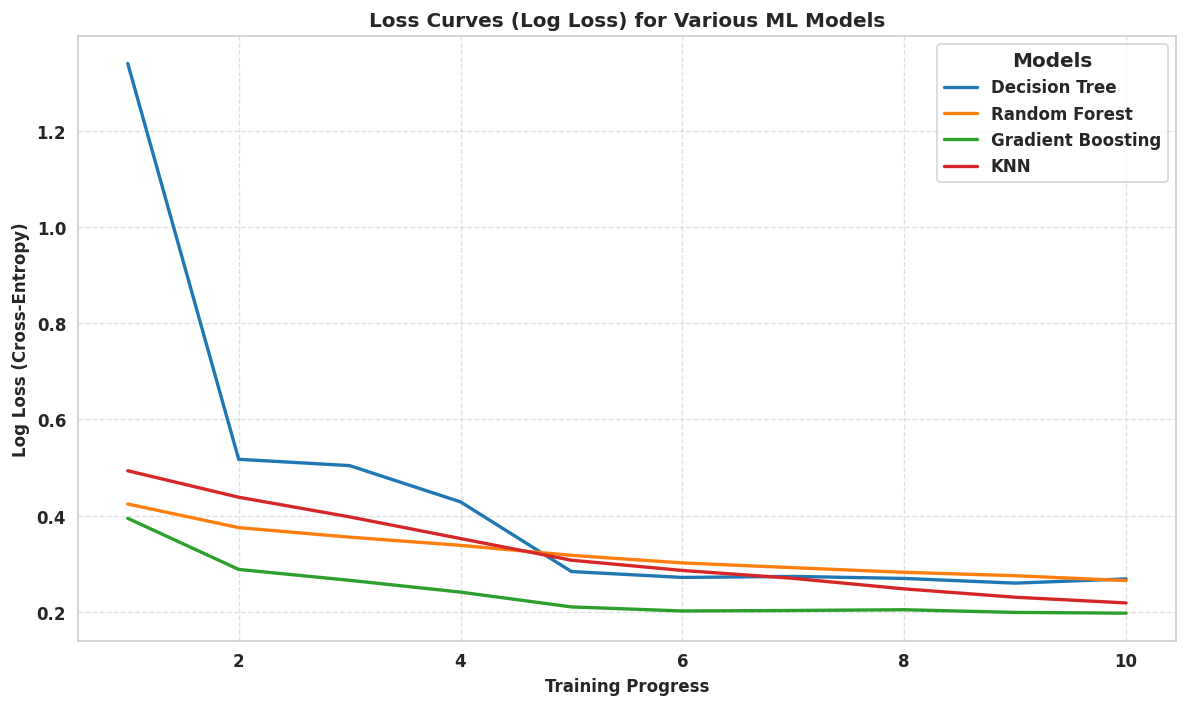

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.base import clone

# -----------------------------
# 0) Models (pipeline ধরে)
# -----------------------------
models = {
    "Decision Tree": dt_pipe,
    "Random Forest": rf_pipe,
    "Gradient Boosting": gb_pipe,
    "KNN": knn_pipe
}

# -----------------------------
# 1) Build loss_curves using increasing train sizes
#    (works for ALL models including KNN)
# -----------------------------
train_fracs = np.linspace(0.1, 1.0, 10)   # 10 points like sir
n_train = len(X_train)

loss_curves = {}

for name, model in models.items():
    losses = []
    for frac in train_fracs:
        m = clone(model)

        k = max(2, int(frac * n_train))  # at least 2 samples
        X_sub = X_train[:k]
        y_sub = y_train[:k]

        m.fit(X_sub, y_sub)

        # predict_proba must exist (your pipelines do)
        y_prob = m.predict_proba(X_test)[:, 1]

        # log loss (binary)
        losses.append(log_loss(y_test, y_prob))

    loss_curves[name] = np.array(losses)

# -----------------------------
# 2) Normalize steps like sir (same length already, but keep sir style)
# -----------------------------
max_steps = max(len(curve) for curve in loss_curves.values())
normalized_loss_curves = {}

for model_name, losses in loss_curves.items():
    normalized_loss_curves[model_name] = np.interp(
        np.linspace(0, len(losses) - 1, max_steps),
        np.arange(len(losses)),
        losses
    )

# -----------------------------
# 3) Plot (Sir style)
# -----------------------------
plt.figure(figsize=(10, 6))

x_axis = np.linspace(1, max_steps, max_steps)

for model_name, losses in normalized_loss_curves.items():
    plt.plot(x_axis, losses, linewidth=2, label=model_name)

plt.title("Loss Curves (Log Loss) for Various ML Models", fontweight="bold")
plt.xlabel("Training Progress", fontweight="bold")
plt.ylabel("Log Loss (Cross-Entropy)", fontweight="bold")

plt.legend(title="Models", fontsize=10, title_fontsize=12, frameon=True)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


# ROC Curve

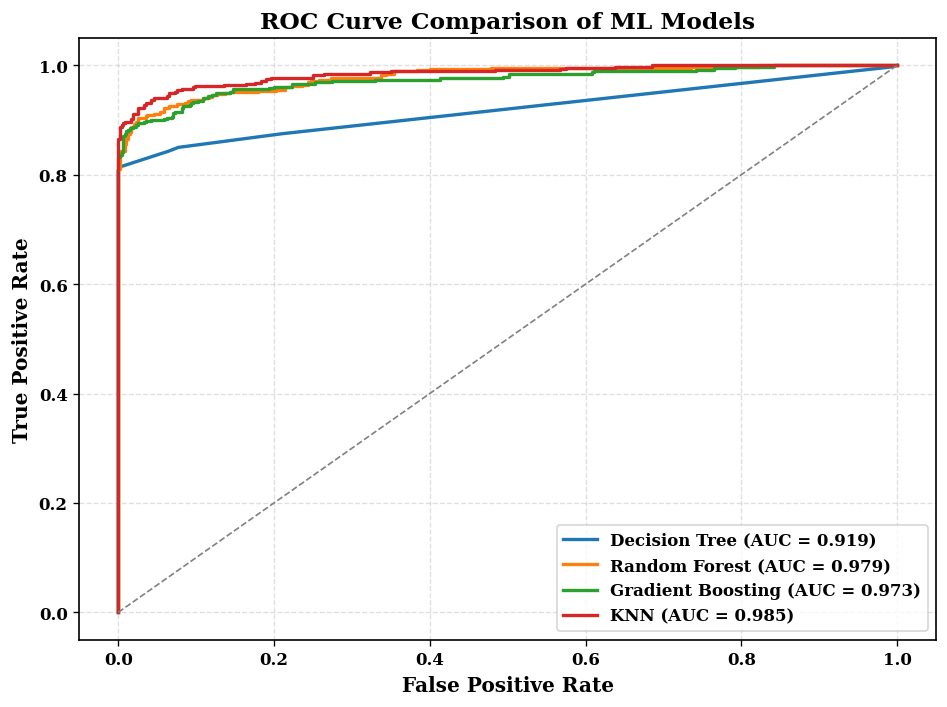

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Models dictionary (pipeline ধরে)
models = {
    "Decision Tree": dt_pipe,
    "Random Forest": rf_pipe,
    "Gradient Boosting": gb_pipe,
    "KNN": knn_pipe
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    # fit model
    model.fit(X_train, y_train)

    # predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # ROC computation
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # plot
    plt.plot(
        fpr,
        tpr,
        linewidth=2,
        label=f"{name} (AUC = {roc_auc:.3f})"
    )

# Diagonal reference line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", linewidth=1)

# 🔹 Bold formatting everywhere
plt.title(
    "ROC Curve Comparison of ML Models",
    fontsize=14,
    fontweight="bold"
)
plt.xlabel(
    "False Positive Rate",
    fontsize=12,
    fontweight="bold"
)
plt.ylabel(
    "True Positive Rate",
    fontsize=12,
    fontweight="bold"
)

plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

plt.grid(True, linestyle="--", alpha=0.4)

leg = plt.legend(loc="lower right", frameon=True)
for text in leg.get_texts():
    text.set_fontweight("bold")

plt.tight_layout()
plt.show()


# Feature-Importance (DT vs RF vs GB)

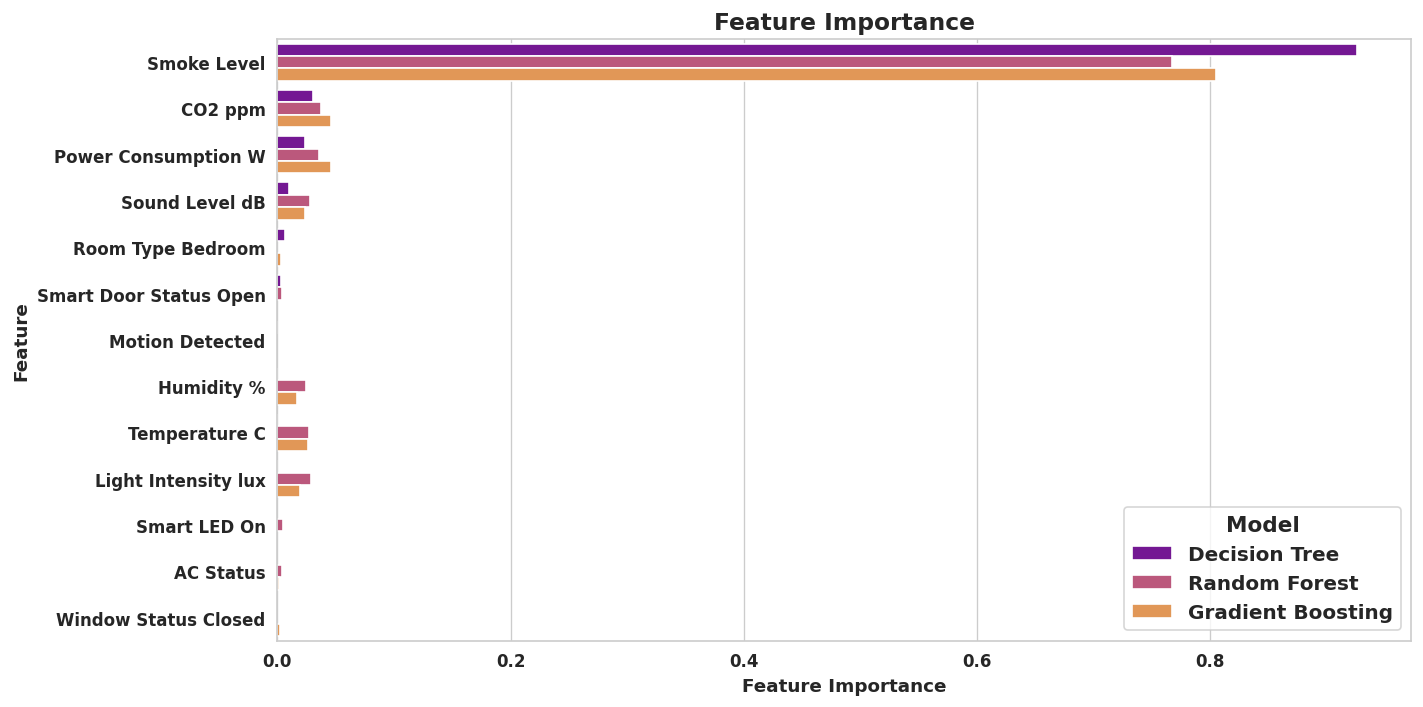

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------------
# 1) Fit models (pipelines)
# -------------------------------------------------
models = {
    "Decision Tree": dt_pipe,
    "Random Forest": rf_pipe,
    "Gradient Boosting": gb_pipe
}

for model in models.values():
    model.fit(X_train, y_train)

# -------------------------------------------------
# 2) Get feature names after preprocessing
# -------------------------------------------------
feature_names = dt_pipe.named_steps["preprocess"].get_feature_names_out()

# -------------------------------------------------
# 3) Sir-style feature importance collector
# -------------------------------------------------
def get_feature_importance(models, feature_names, top_n=10):
    all_importances = []

    for model_name, pipe in models.items():
        model = pipe.named_steps["model"]

        if hasattr(model, "feature_importances_"):
            df = pd.DataFrame({
                "Feature": feature_names,
                "Importance": model.feature_importances_,
                "Model": model_name
            })

            df = df.sort_values(
                by="Importance",
                ascending=False
            ).head(top_n)

            all_importances.append(df)

    return pd.concat(all_importances, axis=0)

all_importances = get_feature_importance(
    models,
    feature_names,
    top_n=10
)

# -------------------------------------------------
# 4) Clean feature names (paper-friendly)
# -------------------------------------------------
def clean_name(x):
    x = x.replace("num__", "")
    x = x.replace("cat__", "")
    x = x.replace("_", " ")
    return x

all_importances["Feature"] = all_importances["Feature"].apply(clean_name)

# -------------------------------------------------
# 5) Plot (Sir-style)
# ------------------------------------------------
plt.figure(figsize=(13, 6))
sns.set_style("whitegrid")

sns.barplot(
    x="Importance",
    y="Feature",
    hue="Model",
    data=all_importances,
    palette="plasma",
    orient="h"
)

plt.title(
    "Feature Importance",
    fontsize=14,
    fontweight="bold"
)
plt.xlabel(
    "Feature Importance",
    fontsize=11,
    fontweight="bold"
)
plt.ylabel(
    "Feature",
    fontsize=11,
    fontweight="bold"
)

# ✅ Legend outside right (NO overlap)
plt.legend(
    title="Model",
    fontsize=12,
    title_fontsize=13,
    loc="right",
    bbox_to_anchor=(1.00, 0.12),
    frameon=True
)

plt.tight_layout(rect=[0, 0, 0.92, 1])
plt.show()
